In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Punto 1


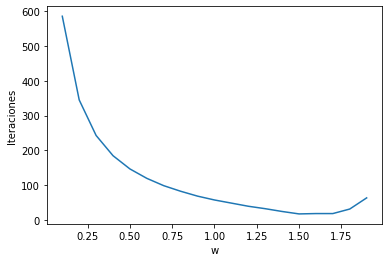

El valor de w para el cual se realizan menos iteraciones es cercano a 1.5
Para parámetros mayores a 2 el método diverge


In [8]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]
    
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = 100
    T[-1,:] = 0.
    
    T[:,0] = 0.
    T[:,-1] = 0.
    
    return T
    

def relajacion(T,w, its = int(1e5), tolerancia = 1e-2):
    
    it_max = 0
    
    for it in range(its):
        
        d_max = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = w*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > d_max:
                    d_max = r
        
        if np.abs(d_max) < tolerancia:
            it_max = it
            break
            
    return T,it_max


w = np.arange(0.1,2.0,0.1)
its = []


for val in w:
  T = InitT()
  Tf1,ite =  relajacion(T, w=val)

  its.append(ite)

plt.plot(w,its)
plt.xlabel('w')
plt.ylabel('Iteraciones')
plt.show()

print("El valor de w para el cual se realizan menos iteraciones es cercano a 1.5")
print("Para parámetros mayores a 2 el método diverge")